In [137]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
import os.path
from pathlib import Path

import scmdata
import json
import pyam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import utils
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

In [4]:
data = pd.read_csv(
    str(Path(utils.DATA_DIR / "interim" / "delta_rf" / f"{ID}_delta-erf.csv"))
)
OUTPUT_FILE = Path(utils.DATA_DIR / "plotting_data" / "figure1" / f"{ID}.csv")

<IPython.core.display.Javascript object>

In [6]:
# set negative temperature values = 0 (to not go below 1.5°C)
data.loc[:, "2020-01-01 00:00:00":"2500-01-01 00:00:00"].clip(lower=0, inplace=True)

<IPython.core.display.Javascript object>

In [7]:
data_sel = data[data["variable"] == "Surface Air Temperature Change"].reset_index(
    drop=True
)

<IPython.core.display.Javascript object>

In [16]:
time_covered = range(2015, 2500 + 1)

<IPython.core.display.Javascript object>

### 5th and 95th percentile over all members and all scenarios

In [46]:
low_quant_path = data_sel.groupby("variable").quantile(q=0.05).iloc[:, 277:].T[7:]
low_quant_path["time"] = time_covered
high_quant_path = data_sel.groupby("variable").quantile(q=0.95).iloc[:, 277:].T[7:]
high_quant_path["time"] = time_covered

<IPython.core.display.Javascript object>

### selecting an exemplary pathway

In [131]:
search_path = data_sel.groupby("ms").median()
search_path[(search_path["2100_warming"] < 2.3)&(search_path['peak_warming']>1.9)&(search_path['average_cdr_between_peak_and_15_temp']> 20000)].iloc[:, 10:30]


,cumulative_pos_emms_at_net0,ensemble_member,max_assigned_CDR,max_deployed_CDR,net_CDR_at_15_temp,peak_warming,run_id,total_CDR,year_return_back_below_15_temp,1750-01-01 00:00:00,1751-01-01 00:00:00,1752-01-01 00:00:00,1753-01-01 00:00:00,1754-01-01 00:00:00,1755-01-01 00:00:00,1756-01-01 00:00:00,1757-01-01 00:00:00,1758-01-01 00:00:00,1759-01-01 00:00:00,1760-01-01 00:00:00
ms,,,,,,,,,,,,,,,,,,,,
MESSAGEix-GLOBIOM_1.1EN_INDCi2030_1800f_NDCp,1.827907e+06,299.5,-13945.048355,-36130.361986,-2.474787e+06,2.236562,18899.5,-5.854744e+06,2178.5,0.0,0.022472,0.031478,0.036948,0.039232,0.041273,0.036365,0.021569,0.026281,0.034785,0.03911
POLES ENGAGEEN_INDCi2030_1600,1.831682e+06,299.5,-13354.194626,-29011.297473,-3.028114e+06,2.267354,11099.5,-5.197295e+06,2230.0,0.0,0.022472,0.031478,0.036948,0.039232,0.041273,0.036365,0.021569,0.026281,0.034785,0.03911


<IPython.core.display.Javascript object>

In [134]:
ex_pathway = data_sel[
    (data_sel["ms"] == "MESSAGEix-GLOBIOM_1.1EN_INDCi2030_1800f_NDCp")
]
# MESSAGEix-GLOBIOM_1.1EN_INDCi2030_1800f_NDCp
# REMIND-MAgPIE 2.1-4.2EN_INDCi2030_2500
# WITCH 5.0EN_INDCi2030_2500_NDCp

<IPython.core.display.Javascript object>

In [135]:
ex_pathway_median = ex_pathway.groupby("variable").median().iloc[:, 277:].T[7:]
ex_pathway_median["time"] = time_covered

low_quant_ex = ex_pathway.groupby("variable").quantile(q=0.05).iloc[:, 277:].T[7:]
low_quant_ex["time"] = time_covered
high_quant_ex = ex_pathway.groupby("variable").quantile(q=0.95).iloc[:, 277:].T[7:]
high_quant_ex["time"] = time_covered

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Time')

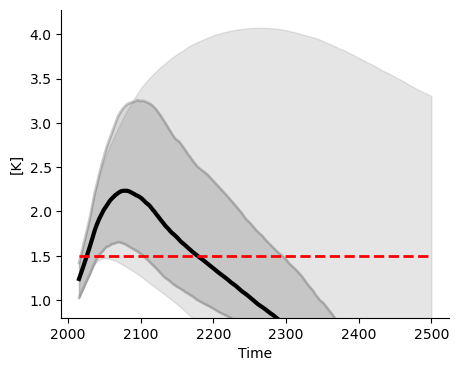

<IPython.core.display.Javascript object>

In [148]:
import seaborn as sns

# Temperature pathways of
fig, ax = plt.subplots(figsize=(5, 4), frameon=False)

sns.lineplot(
    data=ex_pathway_median,
    x="time",
    y="Surface Air Temperature Change",
    color="black",
    alpha=1,
    lw=3,
)
sns.lineplot(
    data=low_quant_ex,
    x="time",
    y="Surface Air Temperature Change",
    color="gray",
    alpha=0.4,
    lw=2,
)
sns.lineplot(
    data=high_quant_ex,
    x="time",
    y="Surface Air Temperature Change",
    color="gray",
    alpha=0.4,
    lw=2,
)
ax.fill_between(
    low_quant_ex["time"],
    low_quant_ex["Surface Air Temperature Change"],
    high_quant_ex["Surface Air Temperature Change"],
    alpha=0.3,
    color="grey",
)


# sns.lineplot(
#     data=low_quant_path,
#     x="time",
#     y="Surface Air Temperature Change",
#     color="gray",
#     alpha=0.3,
# )
# sns.lineplot(
#     data=high_quant_path,
#     x="time",
#     y="Surface Air Temperature Change",
#     color="gray",
#     alpha=0.3,
# )
ax.fill_between(
    low_quant_path["time"],
    low_quant_path["Surface Air Temperature Change"],
    high_quant_path["Surface Air Temperature Change"],
    alpha=0.2,
    color="grey",
)


ax.hlines(1.5, 2015, 2500, color="red", ls="--", lw=2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim(0.8, None)
plt.ylabel("[K]")
# plt.ylabel("Surface Air Temperature Change [K]")
plt.xlabel("Time")

# plt.title("Temperature anomaly")